![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/01_Machine%20Learning%20%26%20Linear%20Regression/01_ml-linear-regression_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- The following list shows the names of tables we can work with:

In [2]:
import seaborn as sns #!
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

- We might see the all the tables and its data in [this GitHub repo](https://github.com/mwaskom/seaborn-data).
- Substitue the `name` by the dataset you want:

In [3]:
exercise = sns.load_dataset(name='exercise') #!
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


## `LinearRegression()` Model in Python

### Fit the Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model_lr = LinearRegression()

In [7]:
target = exercise['pulse']
features = exercise[['id']]

In [8]:
model_lr.fit(X=features, y=target)

LinearRegression()

### Calculate Predictions

In [9]:
model_lr.predict(features)

array([ 82.89247312,  82.89247312,  82.89247312,  84.0516129 ,
        84.0516129 ,  84.0516129 ,  85.21075269,  85.21075269,
        85.21075269,  86.36989247,  86.36989247,  86.36989247,
        87.52903226,  87.52903226,  87.52903226,  88.68817204,
        88.68817204,  88.68817204,  89.84731183,  89.84731183,
        89.84731183,  91.00645161,  91.00645161,  91.00645161,
        92.1655914 ,  92.1655914 ,  92.1655914 ,  93.32473118,
        93.32473118,  93.32473118,  94.48387097,  94.48387097,
        94.48387097,  95.64301075,  95.64301075,  95.64301075,
        96.80215054,  96.80215054,  96.80215054,  97.96129032,
        97.96129032,  97.96129032,  99.12043011,  99.12043011,
        99.12043011, 100.27956989, 100.27956989, 100.27956989,
       101.43870968, 101.43870968, 101.43870968, 102.59784946,
       102.59784946, 102.59784946, 103.75698925, 103.75698925,
       103.75698925, 104.91612903, 104.91612903, 104.91612903,
       106.07526882, 106.07526882, 106.07526882, 107.23

### Create a New DataFrame for the Predictions

In [10]:
exercise['pred_lr'] = model_lr.predict(features)
exercise

,Unnamed: 0,id,diet,pulse,time,kind,pred_lr
0,0,1,low fat,85,1 min,rest,82.892473
1,1,1,low fat,85,15 min,rest,82.892473
2,2,1,low fat,88,30 min,rest,82.892473
3,3,2,low fat,90,1 min,rest,84.051613
4,4,2,low fat,92,15 min,rest,84.051613
...,...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running,115.348387
86,86,29,no fat,130,30 min,running,115.348387
87,87,30,no fat,99,1 min,running,116.507527
88,88,30,no fat,111,15 min,running,116.507527


### Visualize the Model

1. The `x-axis` is represented by the **explanatory variable** you used to fit the model.
2. The `y-axis` is represented by the **predictions** you computed before.

In [11]:
import matplotlib.pyplot as plt

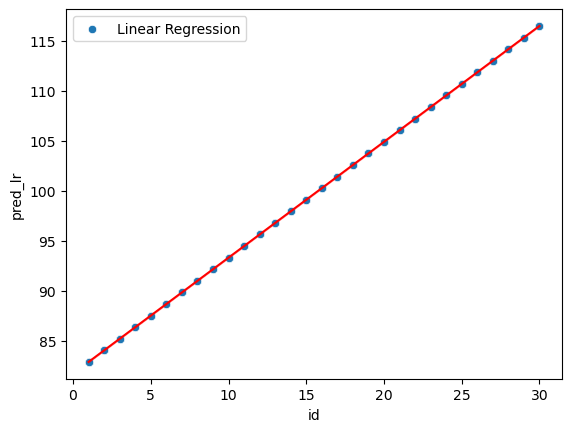

In [12]:
sns.scatterplot(x='id', y='pred_lr', data=exercise, label='Linear Regression');
sns.lineplot(x='id', y='pred_lr', data=exercise, color='red');

### Model Interpretation

1. Especify the **mathematical equation** of the model.
2. **Interpret the coefficients** from the equation.

In [13]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['id'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.15913978]),
 'rank_': 1,
 'singular_': array([82.11272739]),
 'intercept_': 81.73333333333333}

### Model's Score

In [20]:
model_lr.score(X=features, y=target)

0.46105669982784336

## `KNeighborsRegressor()` in Python

### Fit the Model

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
model_kr = KNeighborsRegressor ()

In [23]:
model_kr.fit(X=features, y=target)

KNeighborsRegressor()

### Calculate Predictions

In [24]:
pred_kr = model_kr.predict(X=features)
pred_kr

array([ 88. ,  88. ,  88. ,  89. ,  89. ,  89. ,  94.2,  94.2,  94.2,
        87.8,  87.8,  87.8,  87.4,  87.4,  87.4,  86.6,  86.6,  86.6,
        86.4,  86.4,  86.4,  91.2,  91.2,  91.2,  95.8,  95.8,  95.8,
        98.6,  98.6,  98.6,  91.2,  91.2,  91.2,  94.4,  94.4,  94.4,
        94.4,  94.4,  94.4,  94.6,  94.6,  94.6,  95. ,  95. ,  95. ,
        94.2,  94.2,  94.2,  94.4,  94.4,  94.4,  96.4,  96.4,  96.4,
        96.6,  96.6,  96.6, 101.2, 101.2, 101.2, 101.4, 101.4, 101.4,
       103.4, 103.4, 103.4, 100.8, 100.8, 100.8, 107.2, 107.2, 107.2,
       107.8, 107.8, 107.8, 114.8, 114.8, 114.8, 117.4, 117.4, 117.4,
       121.4, 121.4, 121.4, 117.2, 117.2, 117.2, 116.8, 116.8, 116.8])

### Model's Score

In [25]:
model_kr.score(X=features, y=target)

0.5747812854663621

## `GradientBoostingRegressor()` in Python

### Fit the Model

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
model_gr = GradientBoostingRegressor()

In [28]:
model_gr.fit(X=features, y=target)

GradientBoostingRegressor()

### Calculate Predictions

In [29]:
pred_gr = model_gr.predict(features)
pred_gr

array([ 86.16929553,  86.16929553,  86.16929553,  91.57475889,
        91.57475889,  91.57475889,  95.58100333,  95.58100333,
        95.58100333,  82.16813145,  82.16813145,  82.16813145,
        90.98423275,  90.98423275,  90.98423275,  83.96581978,
        83.96581978,  83.96581978,  88.35530807,  88.35530807,
        88.35530807,  93.73598258,  93.73598258,  93.73598258,
        97.08675815,  97.08675815,  97.08675815,  98.44458812,
        98.44458812,  98.44458812,  85.89569636,  85.89569636,
        85.89569636,  99.13719105,  99.13719105,  99.13719105,
        92.20292765,  92.20292765,  92.20292765,  96.43920426,
        96.43920426,  96.43920426,  93.48585195,  93.48585195,
        93.48585195,  87.18565893,  87.18565893,  87.18565893,
       100.04296824, 100.04296824, 100.04296824,  97.0874939 ,
        97.0874939 ,  97.0874939 ,  98.30107479,  98.30107479,
        98.30107479, 102.13676003, 102.13676003, 102.13676003,
       101.25279357, 101.25279357, 101.25279357, 103.78

### Model's Score

In [30]:
model_kr.score(X=features, y=target)

0.5747812854663621

In [31]:
exercise['pred_kr'] = model_kr.predict(features)
exercise['pred_gr'] = model_gr.predict(features)

## Visualize the 3 Models

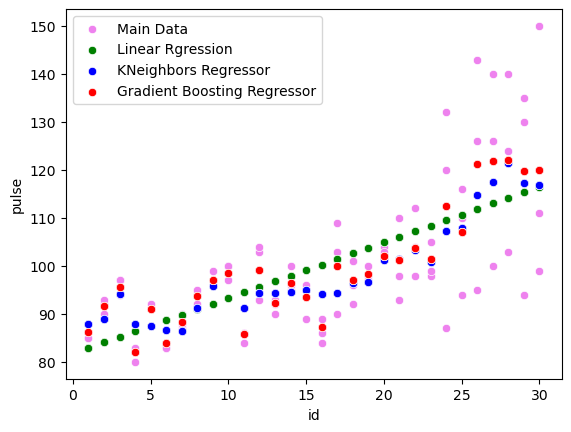

In [32]:
sns.scatterplot(x='id', y='pulse', data=exercise, label='Main Data', color='violet');
sns.scatterplot(x='id', y='pred_lr', data=exercise, label='Linear Rgression', color='green');
sns.scatterplot(x='id', y='pred_kr', data=exercise, label='KNeighbors Regressor', color='blue');
sns.scatterplot(x='id', y='pred_gr', data=exercise, label='Gradient Boosting Regressor', color='red');

## Which One Is the Best Model? Why?

In [33]:
Model_Scores = {}
Model_Scores['model_lr'] = model_lr.score(X=features, y=target)
Model_Scores['model_kr'] = model_kr.score(X=features, y=target)
Model_Scores['model_gr'] = model_gr.score(X=features, y=target)
Model_Scores

{'model_lr': 0.46105669982784336,
 'model_kr': 0.5747812854663621,
 'model_gr': 0.6343297613223007}

In [15]:
import pandas as pd

In [35]:
df_scores = pd.DataFrame()
df_scores['models'] = [model_lr, model_kr, model_gr]
df_scores

,models
0,LinearRegression()
1,KNeighborsRegressor()
2,([DecisionTreeRegressor(criterion='friedman_ms...


In [38]:
df_scores['scores'] = [model_lr.score(X=features, y=target), model_kr.score(features, y=target), model_gr.score(X=features, y=target)]
df_scores

,models,scores
0,LinearRegression(),0.461057
1,KNeighborsRegressor(),0.574781
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.634330


# _GradientBoostingRegressor (model_gr) is the best, because it has highest score which is 63.43% accuracy_

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [x] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [x] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [x] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [x] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [x] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [x] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [x] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.